In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import svm
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import scipy
from sklearn.manifold import TSNE
import seaborn as sn
from sklearn.datasets import make_friedman1
from sklearn.decomposition import SparsePCA

In [2]:
#dataread

SP_df = pd.read_csv('Q3/SP500financials.csv')
VC_df = pd.read_csv('Q3/vehicles.csv')

In [17]:
VC_df.head(2)

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72


In [23]:
len(VC_df)

387

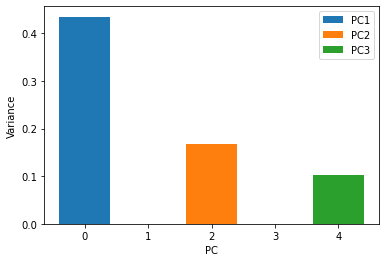

In [3]:
#PCA analysis from BABY PCA STEPS
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def VCR(data):
    
    data = data.dropna()
    #data = data.drop(['Date'], axis = 1)

    data = StandardScaler().fit_transform(data)
    pca = decomposition.PCA(n_components=3)
    res = pca.fit_transform(data)
    r = pca.explained_variance_ratio_

#plot PC vs. Variance
    bar1 = plt.bar(0,r[0])
    bar2 = plt.bar(2,r[1])
    bar3 = plt.bar(4,r[2])
    plt.legend( (bar1,bar2,bar3), ('PC1', 'PC2', 'PC3') )
    plt.xlabel('PC')
    plt.ylabel('Variance')
    plt.show()
    
VCR(VC_df)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doPCA(data):

  norm = StandardScaler().fit_transform(data)
  pca = PCA()
  newdata = pca.fit_transform(norm)
  return newdata,pca


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def doSPCA(data):

  norm = StandardScaler().fit_transform(data)
  spca = SparsePCA(n_components=3, random_state=123)
  pc = spca.fit_transform(norm) 
  n = spca.transform(norm)
  return n,pc

n,pc = doSPCA(VC_df)

In [5]:
def doTSNE(data,k):

    l = data.index
    s_data = StandardScaler().fit_transform(data)

    model = TSNE(n_components = 3 , perplexity=k, random_state = 0)

    tsne_data = model.fit_transform(s_data)

    #tsne_data = np.vstack((tsne_data.T, l)).T
    
    return tsne_data

n = doTSNE(VC_df,20)

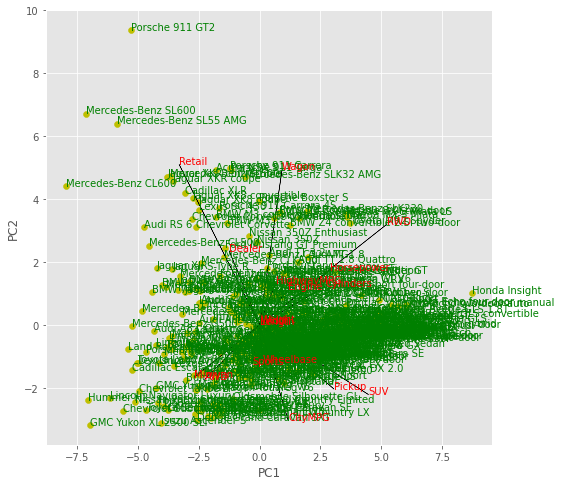

In [15]:
def DD(data):
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(8,8))

    for i in range(len(n)):
        plt.scatter(n[i,0],n[i,1], c = 'y')
        plt.text(n[i,0],n[i,1],data.index[i], c = 'g')

    sc = 10
    for k in range(PC_df.shape[1]):
        plt.text(  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05 , PC_df.index[k] , c= 'r')
        plt.arrow( 0,0,  PC_df.iloc[k,0]*sc + .05  ,  PC_df.iloc[k,1]*sc + .05   , color= 'k')
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    
DD(VC_df)

In [9]:
def imp(data) :
    #data = data.drop(['0'], axis = 1)
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    PC_dim = PC_df
    
    weight = pca.explained_variance_ratio_
    #print(weight)
    
    PC_dim["Feature Importance "] = (PC_dim**2).apply(lambda x : np.sqrt(x.dot(weight)), axis = 1 )
    
    PC_dim = PC_dim.round(decimals=2)
    
    return PC_dim
    
PC_dim = imp(VC_df)
PC_dim

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,Feature Importance
Sports,-0.03,-0.13,0.03,-0.05,-0.0,-0.09,-0.12,-0.26,-0.26,-0.34,-0.33,-0.31,0.31,0.31,-0.33,-0.25,-0.24,-0.29,0.11
SUV,0.44,-0.23,-0.01,-0.21,-0.0,-0.14,0.38,0.34,0.35,0.00,0.08,0.23,0.02,0.04,-0.18,-0.31,-0.27,-0.22,0.33
Wagon,0.09,0.49,0.05,-0.28,-0.0,0.55,-0.24,0.02,0.01,-0.05,-0.06,0.00,-0.14,-0.25,0.09,-0.28,-0.34,-0.14,0.25
Minivan,-0.27,-0.17,0.88,-0.30,-0.0,0.08,0.09,0.04,0.04,-0.00,0.05,0.02,0.01,0.02,0.02,0.06,0.09,-0.08,0.35
Pickup,0.30,-0.21,0.35,0.76,-0.0,0.20,-0.06,0.01,0.01,-0.11,-0.15,-0.02,-0.15,-0.15,0.03,-0.09,-0.17,0.08,0.31
AWD,-0.23,-0.18,-0.13,0.12,-0.0,0.35,-0.42,0.40,0.41,-0.06,-0.04,0.12,0.33,0.33,0.03,0.07,0.08,-0.07,0.23
RWD,0.52,0.32,0.25,-0.08,-0.0,-0.14,-0.21,-0.02,-0.03,0.16,0.03,0.00,0.41,0.31,0.09,-0.03,0.06,0.44,0.38
Retail,-0.34,0.51,0.07,0.32,0.0,-0.10,0.48,0.14,0.14,-0.01,0.03,-0.13,0.31,0.09,0.13,0.07,-0.31,-0.06,0.33
Dealer,-0.13,0.23,0.14,0.08,-0.0,-0.67,-0.50,0.18,0.19,-0.08,-0.09,0.10,-0.18,-0.19,-0.01,-0.11,-0.07,-0.15,0.22
Engine,0.11,0.11,-0.02,-0.18,0.0,0.00,0.21,0.18,0.19,-0.49,-0.63,-0.08,-0.13,-0.07,0.06,0.22,0.23,0.25,0.14


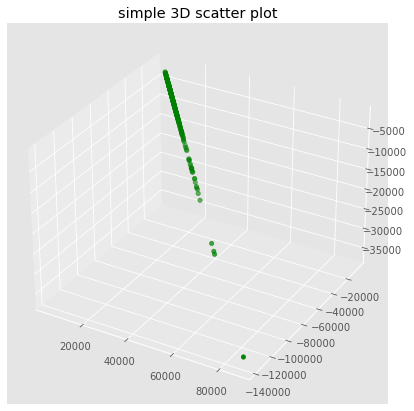

In [33]:

from mpl_toolkits import mplot3d

def DD(data):
    
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    r_score = (np.dot(data,PC)) * (-1)
    
    
    
    
    r_score = (np.dot(data,PC)) * (-1)
    
    
    x = PC[:,0] 
    y = PC[:,1]
    z = PC[:,2]
    
    scr = r_score[:, 0:5]
    
    x_sc = scr[:,0]
    y_sc = scr[:,1]
    z_sc = scr[:,2]

 
# Creating figure
    fig = plt.figure(figsize = (10, 7))
    ax = plt.axes(projection ="3d")
 
# Creating plot
    ax.scatter3D(x_sc, y_sc, z_sc, color = "green")
    plt.title("simple 3D scatter plot")
 
# show plot
    plt.show()
    
DD(VC_df)

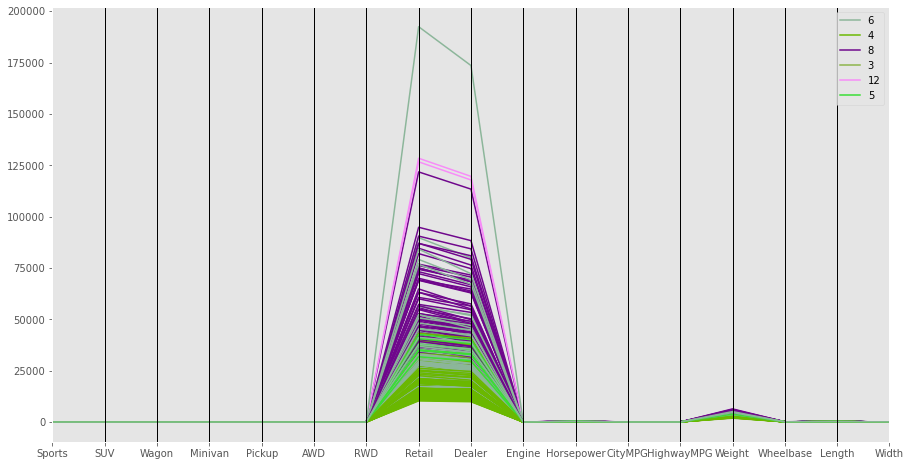

In [10]:
def DD(data):
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)

    plt.figure(figsize=(15, 8))
    parallel_coordinates(data, 'Cylinders')
    plt.legend(loc=1)
    plt.show()

    
DD(VC_df)

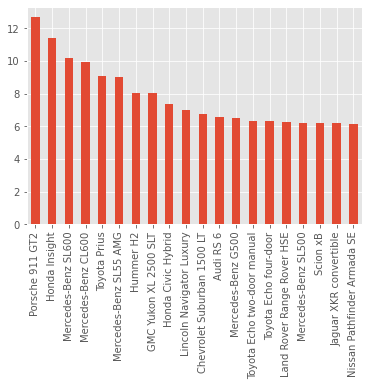

In [11]:
##NSVA 

def do(data):

    AAPL = data
    #AAPL = data.drop('Date',axis=1)
    from sklearn.preprocessing import StandardScaler
    AAPL = StandardScaler().fit_transform(AAPL)
    U, s, Vh = scipy.linalg.svd(abs(AAPL), full_matrices=False)
    U.shape, s.shape, Vh.shape
    X = np.dot (abs(U) , np.diag(s))
    np.shape(X)
    x = (X[:, [0]])
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = data.index)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    return x, X, Vh
    
    
x, X, Vh = do(VC_df)   



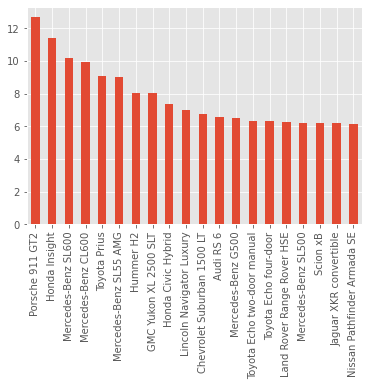

In [12]:
##PCA 


def do(data):

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n,pca = doPCA(data)
    PC = pca.components_
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = data.index)
    newData_df.head(1)
    df = pd.DataFrame(data = X,columns = data.columns)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(VC_df)   


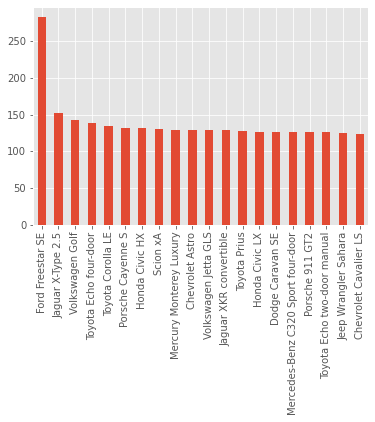

In [13]:
##TSNE


def do(data):

    AAPL = data
    AAPL = StandardScaler().fit_transform(AAPL)
    
    n = doTSNE(data,30)
    PC = n
    PC_df = pd.DataFrame(data=PC)
    
    X = n
    
    np.shape(X)
    newData_df = pd.DataFrame(data = X,  columns = ['PC' + str(i) for i in range(X.shape[1])], index = data.index)
    newData_df.head(1)
    df = pd.DataFrame(data = X)
    newData_df['Ranking'] = newData_df.apply( lambda x : np.sqrt(x.dot(x)), axis =1)
    ranking_20 = newData_df.Ranking.sort_values(ascending = False)[0:20]
    #print(ranking_20)
    ranking_20.plot.bar()

    plt.show()
    
    
do(VC_df)   


In [43]:
dt1 = VC_df
dt1["Type"] = np.where(dt1["Sports"]==1,"Sports","Other")
dt1["Type"] = np.where(dt1["SUV"]==1,"SUV",dt1["Type"])
dt1["Type"] = np.where(dt1["SUV"]==1,"Wagon",dt1["Type"])
dt1["Type"] = np.where(dt1["Minivan"]==1,"Minivan",dt1["Type"])
dt1["Type"] = np.where(dt1["Pickup"]==1,"Pickup",dt1["Type"])
dt1["Type"] = np.where(dt1["AWD"]==1,"AWD",dt1["Type"])
dt1["Type"] = np.where(dt1["RWD"]==1,"Minivan",dt1["Type"])
dt1.head(2)

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width,Type
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72,Other
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72,Other


In [45]:

VC_df.head(2)

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width,Type
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72,Other
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72,Other


C:\Users\chsha\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


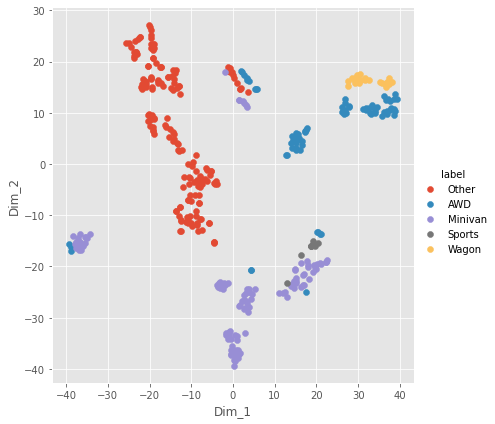

In [44]:



data = dt1

l = data.Type
data = data.drop(['Type'], axis = 1)
s_data = StandardScaler().fit_transform(data)

model = TSNE(n_components = 2 , perplexity=20.0, random_state = 0)

tsne_data = model.fit_transform(s_data)

tsne_data = np.vstack((tsne_data.T, l)).T

tsne_df = pd.DataFrame(data = tsne_data,columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()


In [21]:
data = VC_df
data = data.dropna()
d = data
    
    
dtt =StandardScaler().fit_transform(data)
data = pd.DataFrame(dtt, columns=data.columns)
data = data.dropna()
    
data_cov = np.cov(data.T)
    
df = data_cov
df = df[~np.isnan(df)]
data_cov = df
    #PC's and Variance
np.shape(data_cov.reshape(18,18))

(18, 18)

In [64]:

from mpl_toolkits import mplot3d

def DD(data):
    
    data = data.dropna()
    d = data
    
    
    dtt =StandardScaler().fit_transform(data)
    data = pd.DataFrame(dtt, columns=data.columns)
    data = data.dropna()
    
    data_cov = np.cov(data.T)
    
    df = data_cov
    df = df[~np.isnan(df)]
    data_cov = df
    #PC's and Variance
    Variance, PCs=np.linalg.eig(data_cov.reshape(18,18))
    PC = PCs
    PC_df = pd.DataFrame(data=PC, index = data.columns)
    
    
    r_score = (np.dot(data,PC)) * (-1)
    
    
    x = PC[:,0] 
    y = PC[:,1]
    z = PC[:,2]
    
    scr = r_score[:, 0:5]
    
    x_sc = scr[:,0]
    y_sc = scr[:,1]
    z_sc = scr[:,2]

    plt.style.use('ggplot')
    fig=plt.figure(figsize=(12,12))
    ax = plt.axes(projection ="3d")

    for i in range(len(x)):
        
        ax.scatter( x[i], y[i], z[i],color='c')
        ax.text(x[i] *2, y[i] *2, z[i] *2,list(data.columns.values)[i], color='k')

    for i in range(len(x_sc)):
        
        ax.scatter(x_sc[i], y_sc[i], z_sc[i], 'bo', alpha=0.01)
        ax.text(x_sc[i] * 2, y_sc[i] * 2, z_sc[i] *2, list(d.index)[i], color='y', alpha=0.5)
    
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.ylabel("PC3")
    plt.show()
    
DD(VC_df)

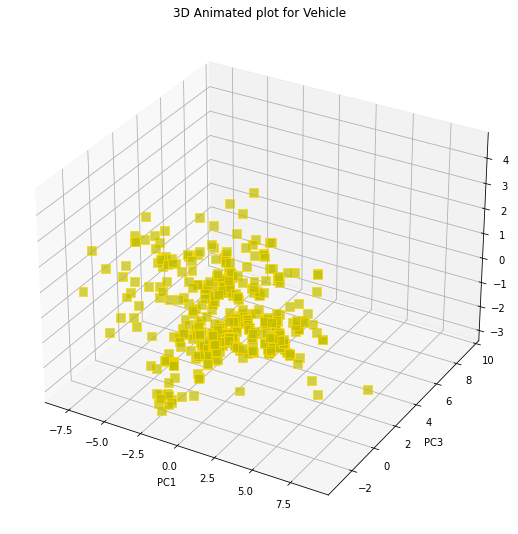

In [29]:

from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.core.display import display, HTML
import matplotlib.animation as animation

def DD(data):
    
    data = data.dropna()
    d = data
    data = StandardScaler().fit_transform(data)
    pca = decomposition.PCA(n_components=3)
    res = pca.fit_transform(data)
    
    
    fig=plt.figure(figsize=(10,7))
    ax = Axes3D(fig)
    ax.set_title("3D Animated plot for Vehicle")
    
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_ylabel("PC3")
    
    mk_list = ['o','p','h','s','>']
    c_list = ['r','b','c','gold']
    cmap = plt.get_cmap("tab20")
    
    label = d.index
    
    for i in range(len(label)):
        
        ax.scatter( res[i:,0] , res[i:,1] ,  res[i:,2] , label =label[i], 
                   marker ='s', color ='y', edgecolor = 'gold' , alpha = .7 , s = 80   )

        
        def init():
            plt.close(fig)
            return fig
        
        def animate(i):
            ax.view_init(elev = 30,azim = 3.6*i)
            return fig
        
        ani = animation.FuncAnimation (fig, animate , init_func = init , frames = 100, interval = 100 )
        
        return ani
    
    
    plt.show()
    
DD(VC_df)

In [16]:
len(VC_df)

387